## Goal
To create visualizations commonly used in exploratory data analysis. They will be categorized according to their purposes.

In [1]:
import numpy as np
import pandas as pd;

In [2]:
# lets gets started with some data import. 
data_path = '../../input_data/forestfires.csv'

df = pd.read_csv(data_path)

Attribute Information:

For more information, read [Cortez and Morais, 2007]. 
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
(this output variable is very skewed towards 0.0, thus it may make 
sense to model with the logarithm transform).



In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [43]:
# Some sorting

df["Month"] = pd.to_datetime(df.month, format='%b', errors='coerce').dt.month
df = df.sort_values(by="Month")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Month
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00,1
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,1
411,7,4,feb,fri,84.6,3.2,43.6,3.3,8.2,53,9.4,0.0,4.62,2
463,6,5,feb,tue,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,2
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,2


In [ ]:
Lets get started with some _distribution plots_ to get an idea of what the individual data columns look like

## Distribution plots 

Lets get started with visualizing continuous variables 

In [5]:
# import the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns;

In [10]:
# Some basic settings, shall we. 
sns.set(rc={'figure.figsize':(15,8.27)}) # figure sizes
sns.set_style("whitegrid") # setting the style 
#sns.set_palette('colorblind') ## Always colorblind

In your visualizations, please always be courteous enough to set the palette to be 'Colorbind'. 

#### Histograms, Kernel Density Estimation Plots and Rug Plots

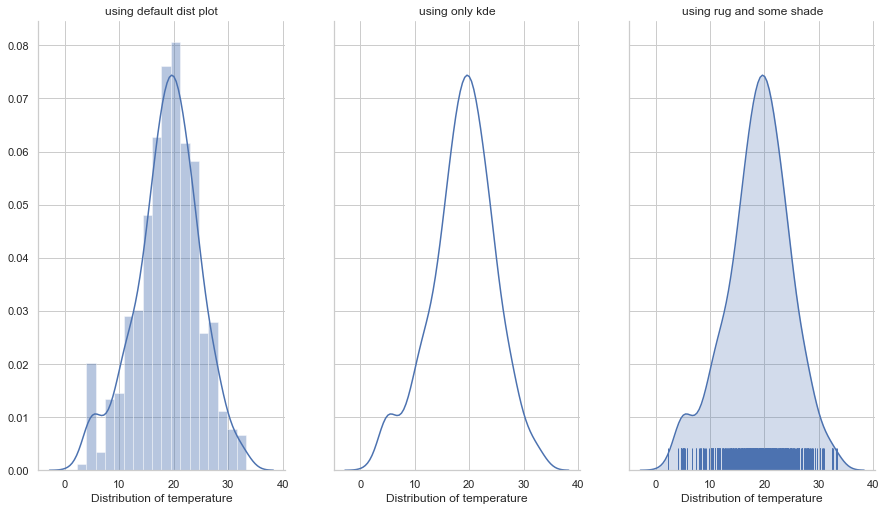

In [17]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True)


sns.distplot(df.temp, ax= ax0)# Simple default dist plot gives histogram and the kde plot
ax0.set(xlabel='Distribution of temperature', title= "using default dist plot")


sns.distplot(df.temp, hist=False, ax=ax1) # just the kde plot 
ax1.set(xlabel='Distribution of temperature', title= "using only kde")

sns.distplot(df.temp, hist=False, rug=True, kde_kws={'shade':True}, ax=ax2) #kde with the rug plot and some 'Shade'
ax2.set(xlabel='Distribution of temperature', title= "using rug and some shade")

sns.despine(right=True, top=True)

#### Box plots 

TODO: talk about binning bias and introduce Box plot

[Text(0, 0.5, 'Distribution of temprature'),
 Text(0.5, 1.0, 'Using a box plot to show distributions')]

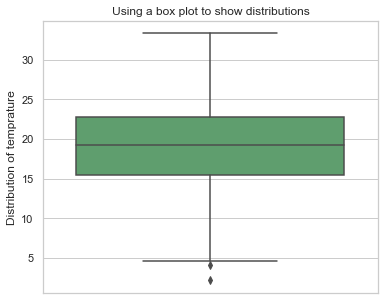

In [25]:
plt.figure(figsize=(6,5))

ax = sns.boxplot(x = df.temp, orient="v", color= 'g')
ax.set(title = 'Using a box plot to show distributions', ylabel="Distribution of temprature")

If we want to visualize the distibution of a continuous variable across certain categories, that will require us to create one histogram per category ( in this case 12 ).  
Box plots make that easier , by sqeezing the numerous distributions across all categories into a **single** plot.  
For example, in this data, let us visualize the distribution of temperature across different months of the year where
* continuous variable >> temperature 
* categories >> months of a year 

[Text(0, 0.5, 'Months'),
 Text(0.5, 0, 'Temprature'),
 Text(0.5, 1.0, 'Distribution of temperature across months')]

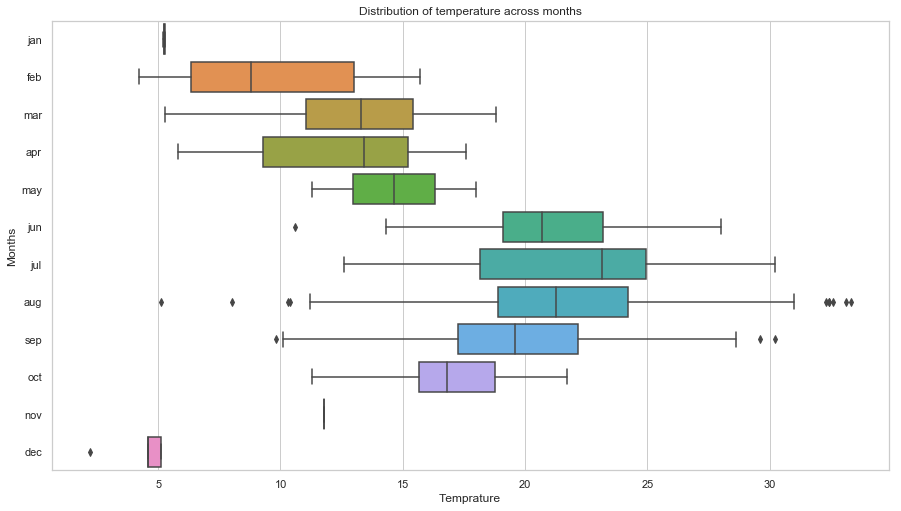

In [44]:
ax = sns.boxplot(data = df, x = 'temp', y='month')
ax.set(title = "Distribution of temperature across months", xlabel= "Temprature", ylabel = "Months")